## Problem Statement :

To classify the traffic sign board using German traffic sign recognition benchmark (GTSRB) data in various classes using CNN.

## Problem Type: 
Multiclass Image Classification using Deep Learning.

## Dataset:
The dataset we have used for this project is the GTSRB (German traffic sign recognition benchmark). It contains a Train folder that has 39,209 traffic sign images in 43 different classes, a Test folder that has over 12,631 images for testing purposes. A test.csv file that contains the path of the test images along with their respective classes. 
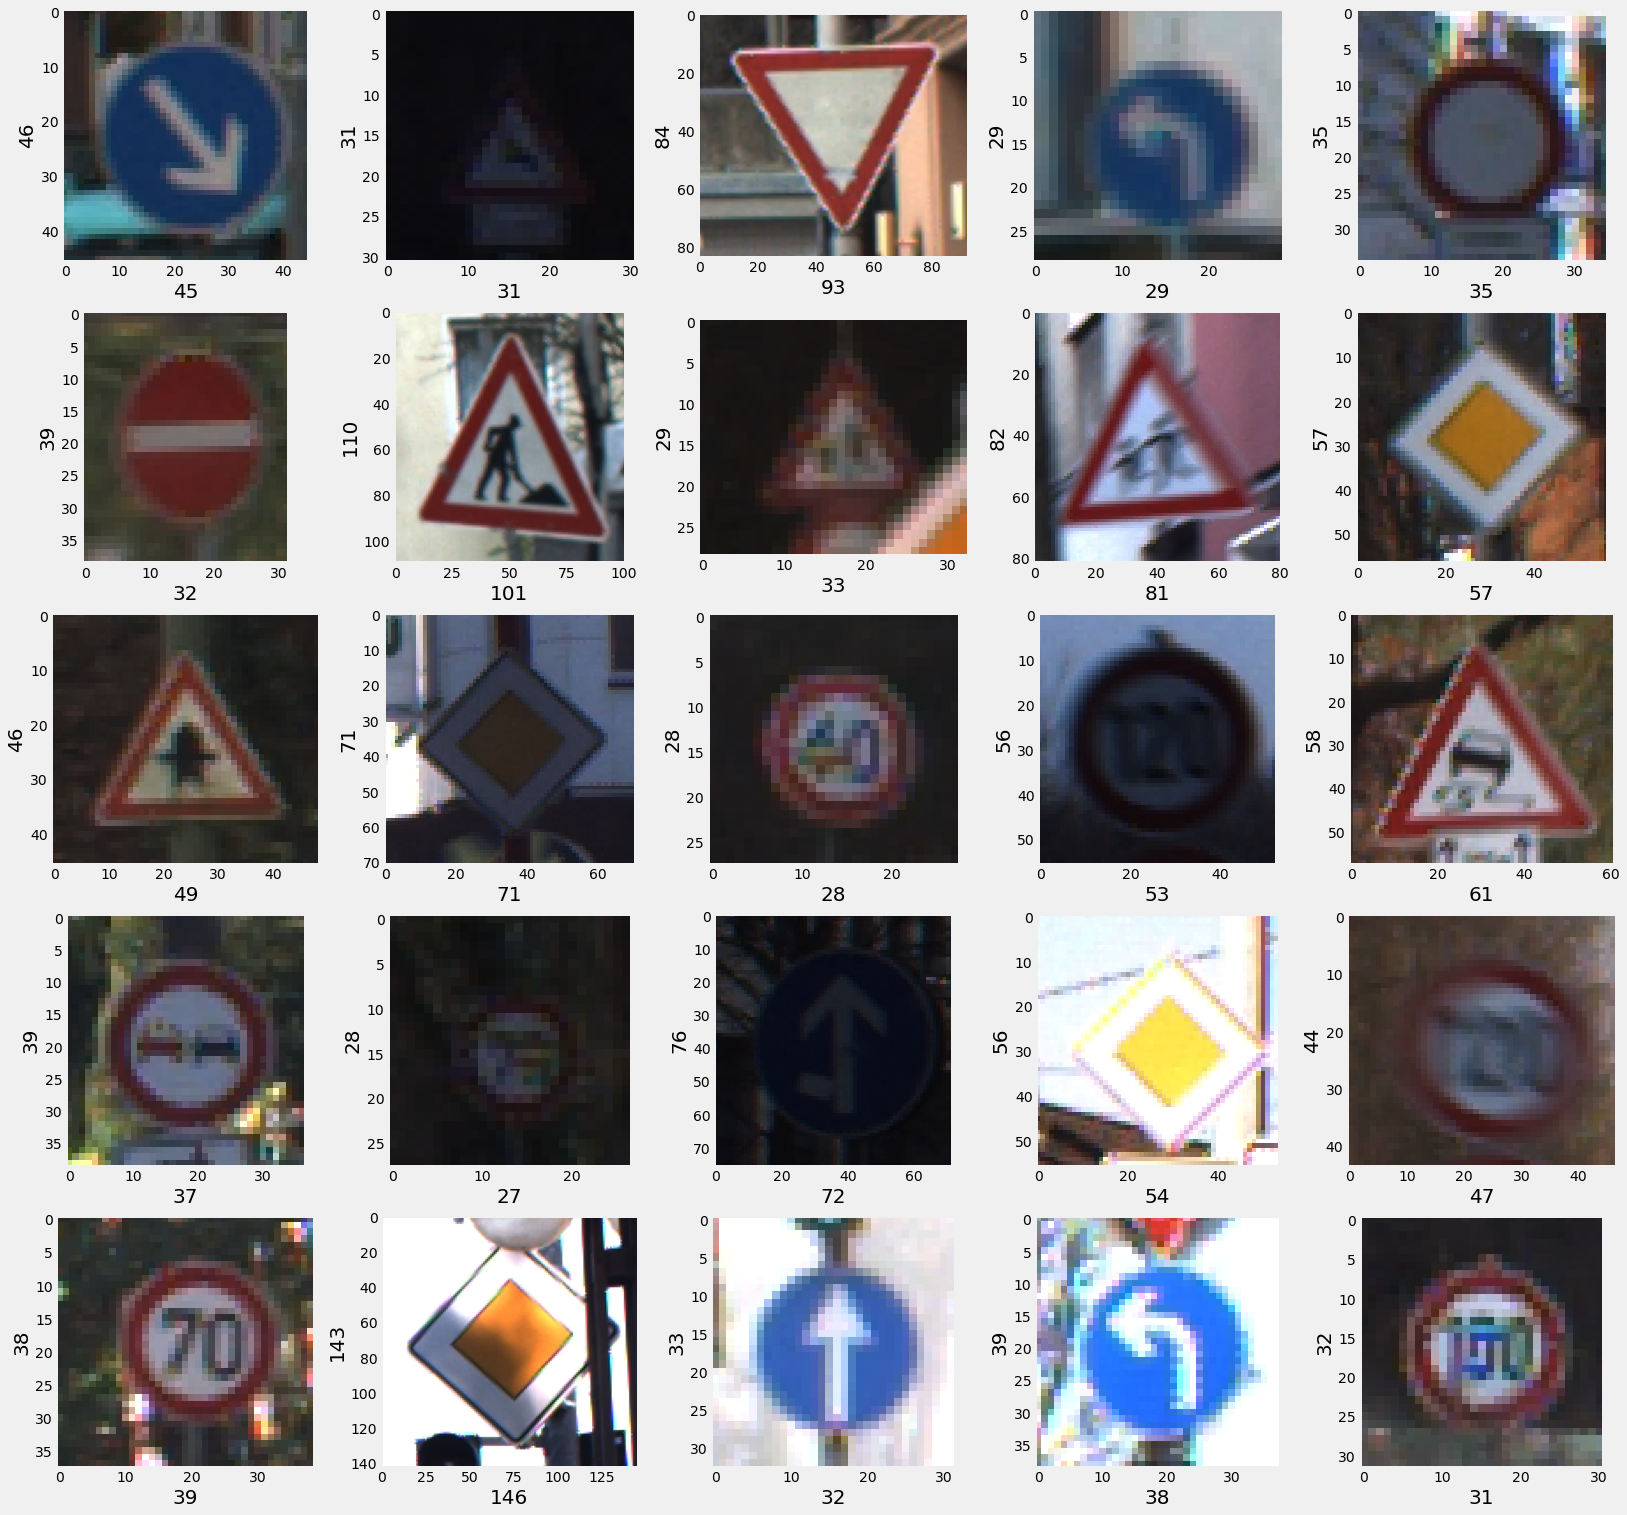

## Libraries used :
1)Numpy 
2)Pandas
3)Matplotlib
4)Tensorflow
5)PIL(python image library)
6)Keras API
7)Sklearn
8)OpenCV
9)Os

## Algorithm used : 
Convolutional Neural Network (CNN) 
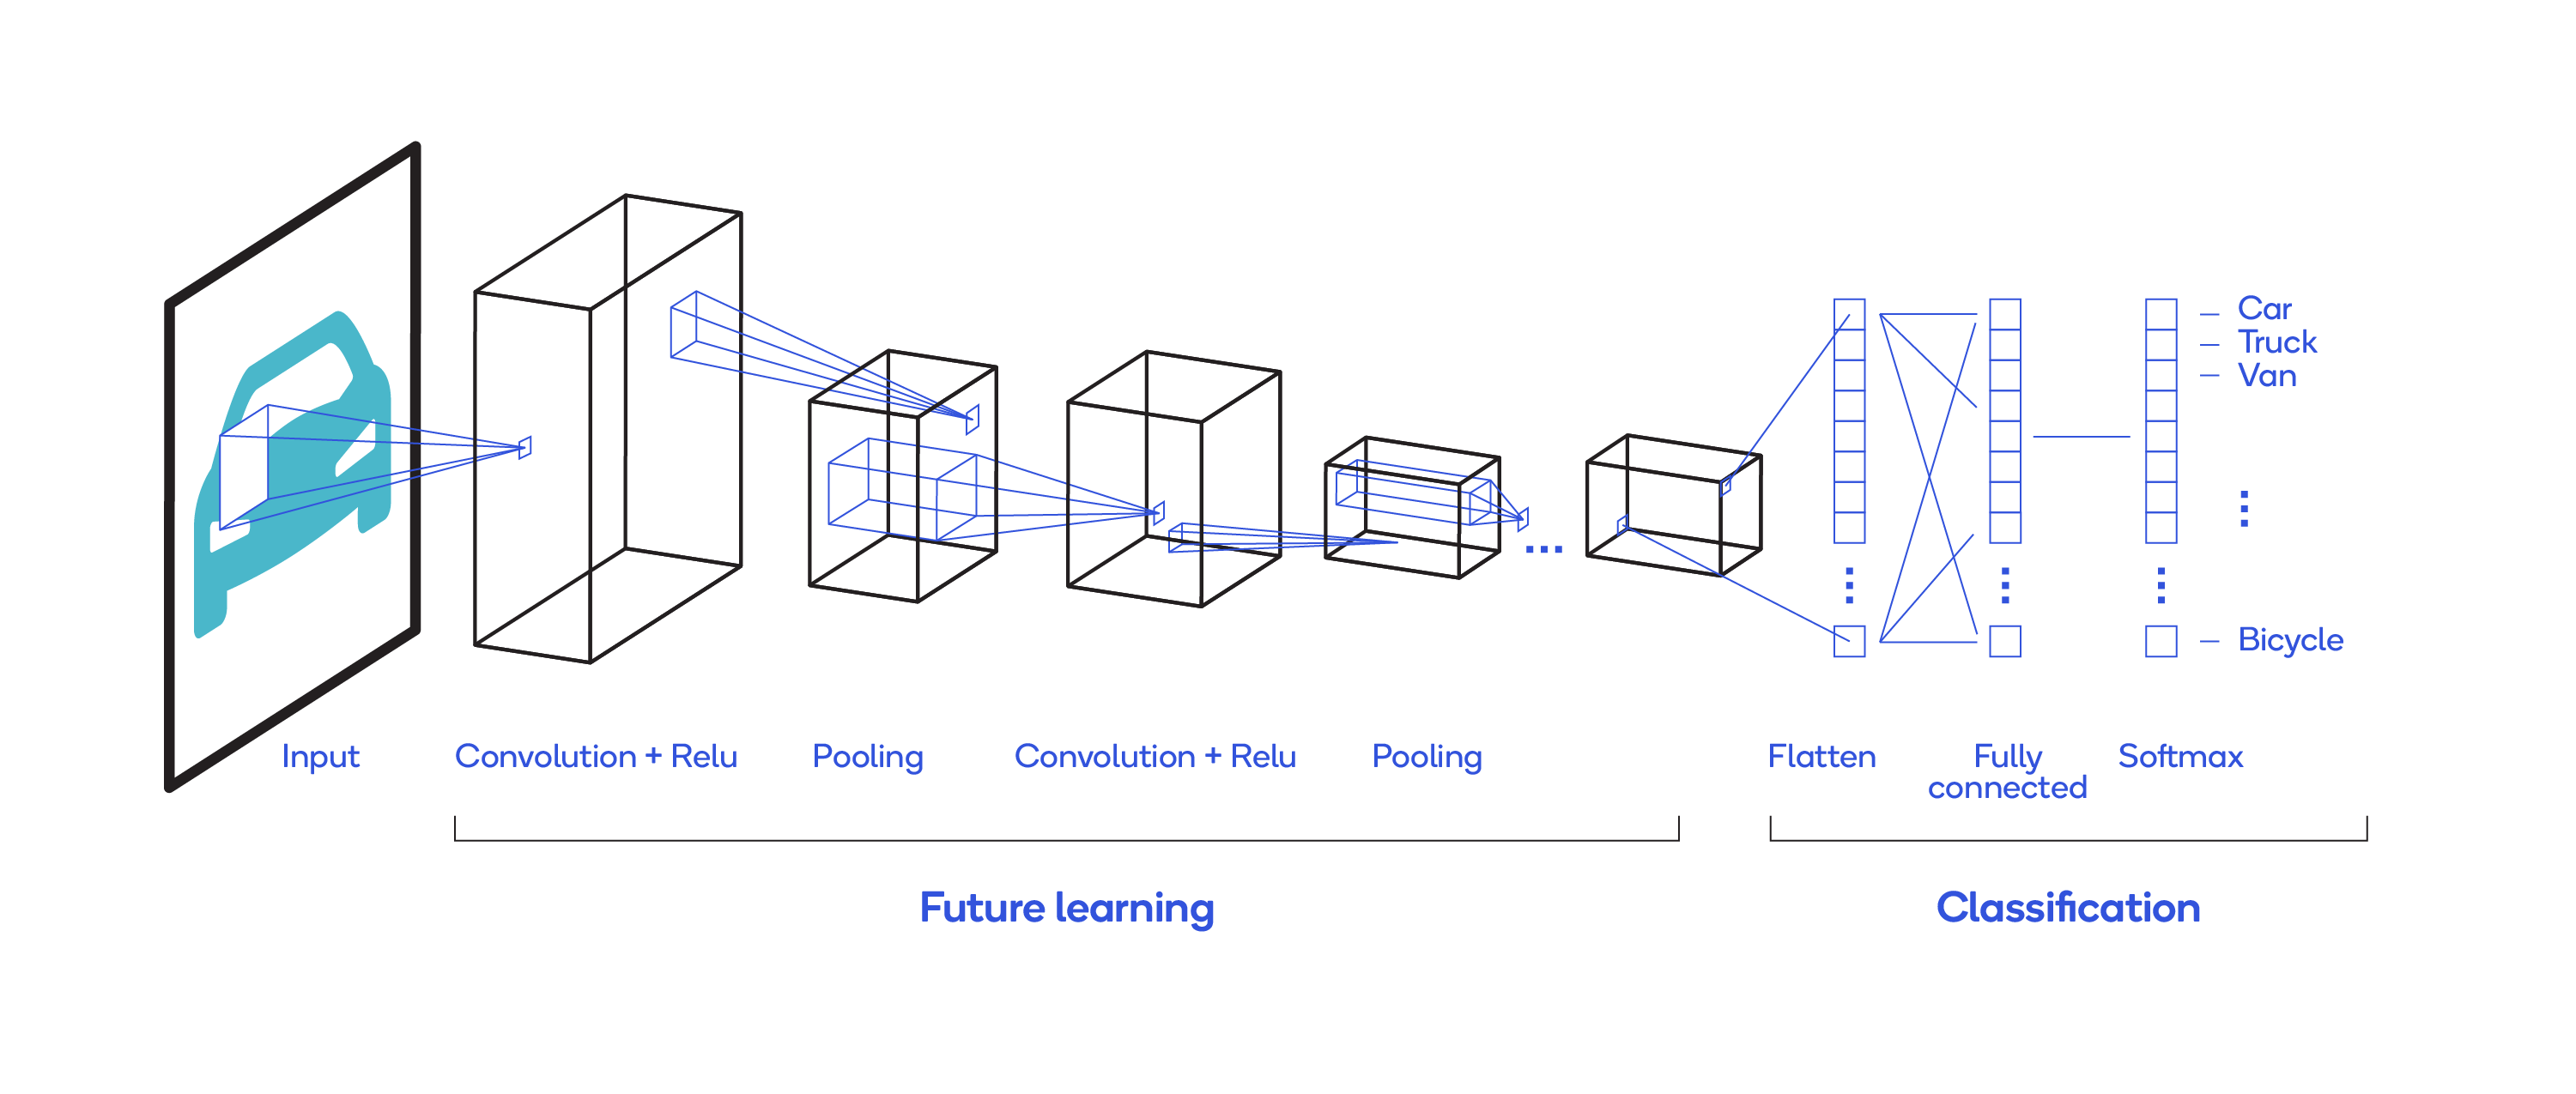

## Project assigned by-
Anupma Sharma

Ph.D. Research Scholar

Signals and Software Group (SaSg)

Department of Electrical Engineering

Indian Institute of Technology (IIT) Indore,India

## Submitted by-
Gyan Kashyap Hazarika

B.tech in Electronics and Telecommunication Engineering

Assam Engineering College,Jalukbari,Guwahati

## BUILDING THE PROJECT

## <font color = "blue">Importing the libraries </font>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
Root = "D:\Traffic_Sign_Recognition"
os.chdir(Root)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## <font color = "blue">Collecting the training data</font>

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()


In [3]:

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## <font color = "blue">Splitting the data into training and testing set set</font>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## <font color = "blue">One hot encoding</font>

In [8]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## <font color = "blue">Making the CNN model using Keras API</font>

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## <font color = "blue">Setting the training parameters and training the CNN model</font>

In [10]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#Training of the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 79s 66ms/step - loss: 4.0942 - accuracy: 0.0603 - val_loss: 1.8497 - val_accuracy: 0.5310
Epoch 2/15
981/981 [==============================] - 65s 67ms/step - loss: 1.7163 - accuracy: 0.5008 - val_loss: 0.6989 - val_accuracy: 0.8040
Epoch 3/15
981/981 [==============================] - 65s 67ms/step - loss: 0.8778 - accuracy: 0.7377 - val_loss: 0.2459 - val_accuracy: 0.9323
Epoch 4/15
981/981 [==============================] - 65s 67ms/step - loss: 0.5021 - accuracy: 0.8475 - val_loss: 0.2273 - val_accuracy: 0.9259
Epoch 5/15
981/981 [==============================] - 66s 67ms/step - loss: 0.4096 - accuracy: 0.8814 - val_loss: 0.1315 - val_accuracy: 0.9626
Epoch 6/15
981/981 [==============================] - 66s 68ms/step - loss: 0.3223 - accuracy: 0.9052 - val_loss: 0.0990 - val_accuracy: 0.9723
Epoch 7/15
981/981 [==============================] - 65s 67ms/step - loss: 0.3154 - accuracy: 0.9157 - val_loss: 0.0888 - val_accuracy:

#### We get an accuracy of 94.09 % on the training dataset.

## <font color = "blue">Plotting the accuracy and loss</font>

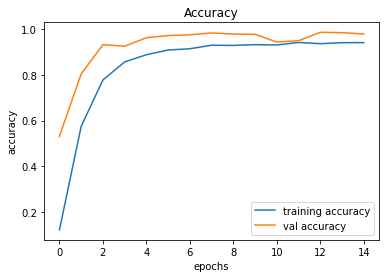

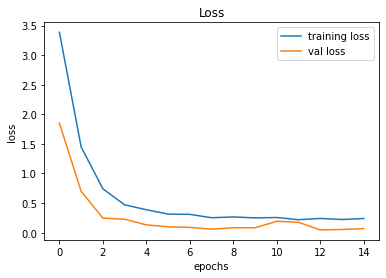

In [12]:
#plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## <font color = "blue">Testing on test data</font>

In [13]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

## <font color = "blue">Checking the accuracy</font>

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.948535233570863


#### We achieved a 94.85 % accuracy in this model.

